# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [3]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


## Let's look at them

In [6]:
train.shape, test.shape

((42000, 785), (28000, 784))

In [7]:
def select_pic(i):
    arr = np.array(test[i:i+1])
    pix = arr.reshape(arr.shape[0], 28, 28)
    img = pix[0]
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.show()

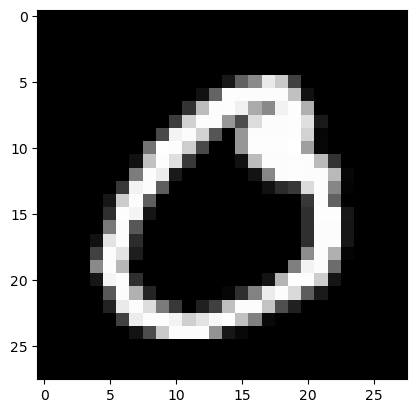

In [8]:
for i in range(0,1):
    r = np.random.randint(i,10000)
    select_pic(r)

## Preproccesing our data

### Reshape features and targets

In [9]:
X = train.drop('label',axis=1).values/255.0
X = X.reshape(-1, 28, 28, 1)
X.shape

(42000, 28, 28, 1)

In [10]:
Y = train['label'].values
Y.shape

(42000,)

In [11]:
A = test.values/255.0
A = A.reshape(-1, 28, 28, 1)
A.shape

(28000, 28, 28, 1)

## Preparing our data to learn

In [12]:
from tensorflow.keras.utils import to_categorical

Y = to_categorical(Y, num_classes = 10)
Y.shape

(42000, 10)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print('-'*50)
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train: (33600, 28, 28, 1), y_train: (33600, 10)
--------------------------------------------------
X_test: (8400, 28, 28, 1), y_test: (8400, 10)


## Buil model

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization


model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(28,28,1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

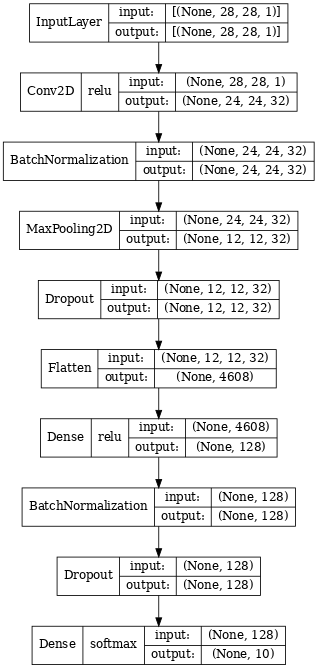

In [15]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=False, 
           dpi=60, show_layer_activations=True, rankdir='TB')

In [16]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Fit model

In [17]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                   epochs = 5,
                   batch_size=200)

Epoch 1/5


2023-03-15 14:47:18.174732: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


168/168 [==============================] - 9s 7ms/step - loss: 0.2837 - accuracy: 0.9159 - val_loss: 1.5682 - val_accuracy: 0.5710
Epoch 2/5
168/168 [==============================] - 1s 5ms/step - loss: 0.1021 - accuracy: 0.9692 - val_loss: 1.0050 - val_accuracy: 0.6856
Epoch 3/5
168/168 [==============================] - 1s 6ms/step - loss: 0.0678 - accuracy: 0.9797 - val_loss: 0.1476 - val_accuracy: 0.9711
Epoch 4/5
168/168 [==============================] - 1s 5ms/step - loss: 0.0550 - accuracy: 0.9835 - val_loss: 0.0513 - val_accuracy: 0.9857
Epoch 5/5
168/168 [==============================] - 1s 5ms/step - loss: 0.0442 - accuracy: 0.9865 - val_loss: 0.0517 - val_accuracy: 0.9851


In [37]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.283683,0.915863,1.568179,0.570952
1,0.102089,0.969167,1.005012,0.685595
2,0.067755,0.979732,0.147645,0.971071
3,0.054953,0.983512,0.051305,0.985714
4,0.044156,0.986488,0.051683,0.985119


## Predict

In [66]:
predict = [np.argmax(i) for i in model.predict(A)]
len(predict)

875/875 [==============================] - 2s 2ms/step


28000

In [67]:
ids = [i+1 for i in test.index]
len(ids)

28000

In [74]:
submission = pd.DataFrame(columns=['ImageId','Label'])
submission['ImageId'] = ids
submission['Label'] = predict

In [75]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


## Send submission

In [76]:
submission.to_csv('/kaggle/working/submission.csv', index=False)